<font size="5">**ABHISHEK KUMAR SINGH**</font>

<font size="5">**2K19/CO/021**</font>

**<font size="8"><center>EXPERIMENT - 4</center></font>**

**AIM:** To describe data using various methods (Pie charts, Bar charts, Outlier detection using Boxplots and Histograms).

**THEORY**

**Pie charts**

A pie chart is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. Pie charts is widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword.

**Bar Charts**

A bar plot is a way of representing data where the *length* of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

*   `kind=bar` creates a *vertical* bar plot
*   `kind=barh` creates a *horizontal* bar plot

**Box Plots**

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions:

*   **Minimum:** The smallest number in the dataset excluding the outliers.
*   **First quartile:** Middle number between the `minimum` and the `median`.
*   **Second quartile (Median):** Middle number of the (sorted) dataset.
*   **Third quartile:** Middle number between `median` and `maximum`.
*   **Maximum:** The largest number in the dataset excluding the outliers.

![boxplot](boxplot_complete.png)  

To make a `boxplot`, we can use `kind=box` in `plot` method invoked on a *pandas* series or dataframe.


**Histograms**

A histogram is a way of representing the *frequency* distribution of numeric dataset. The way it works is it partitions the x-axis into *bins*, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.


**CODE AND OUTPUT:**

**Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [4]:
other_path = 'house_data.csv'
df = pd.read_csv(other_path)

In [5]:
# Print first five rows of the dataframe

df.head()

,sqft_living,bedrooms,bathrooms,floors,waterfront,condition,yr_built,yr_renovated,price
0,1180,3.0,1.00,1.0,0,3,1955,0,221900
1,2570,3.0,2.25,2.0,0,3,1951,1991,538000
2,770,2.0,1.00,1.0,0,3,1933,0,180000
3,1960,4.0,3.00,1.0,0,5,1965,0,604000
4,1680,3.0,2.00,1.0,0,3,1987,0,510000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10805 entries, 0 to 10804
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sqft_living   10805 non-null  int64  
 1   bedrooms      10796 non-null  float64
 2   bathrooms     10797 non-null  float64
 3   floors        10805 non-null  float64
 4   waterfront    10805 non-null  int64  
 5   condition     10805 non-null  int64  
 6   yr_built      10805 non-null  int64  
 7   yr_renovated  10805 non-null  int64  
 8   price         10805 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 759.9 KB


**Handling Missing Values**

In [7]:
#Replace the "?" symbol with NaN

df.replace('?',np.NaN, inplace=True)
df.shape

(10805, 9)

In [8]:
#Drop missing values along the column "price"

df.dropna(subset=["price"], axis=0, inplace=True)

# Reset index, because we droped rows
df.reset_index(drop=True, inplace=True)
df.shape

(10805, 9)

In [9]:
df.isnull().sum()

sqft_living     0
bedrooms        9
bathrooms       8
floors          0
waterfront      0
condition       0
yr_built        0
yr_renovated    0
price           0
dtype: int64

In [10]:
#Replace the missing values by the most frequent

mode_bedrooms = df['bedrooms'].value_counts().idxmax()
print("Most frequent bedrooms:", mode_bedrooms)
df["bedrooms"].replace(np.nan, mode_bedrooms, inplace=True)


mode_bathrooms = df['bathrooms'].value_counts().idxmax()
print("Most frequent bathrooms:", mode_bathrooms)
df["bathrooms"].replace(np.nan, mode_bathrooms, inplace=True)

Most frequent bedrooms: 3.0
Most frequent bathrooms: 2.5


In [11]:
df.isnull().sum()

sqft_living     0
bedrooms        0
bathrooms       0
floors          0
waterfront      0
condition       0
yr_built        0
yr_renovated    0
price           0
dtype: int64

**Describe data**

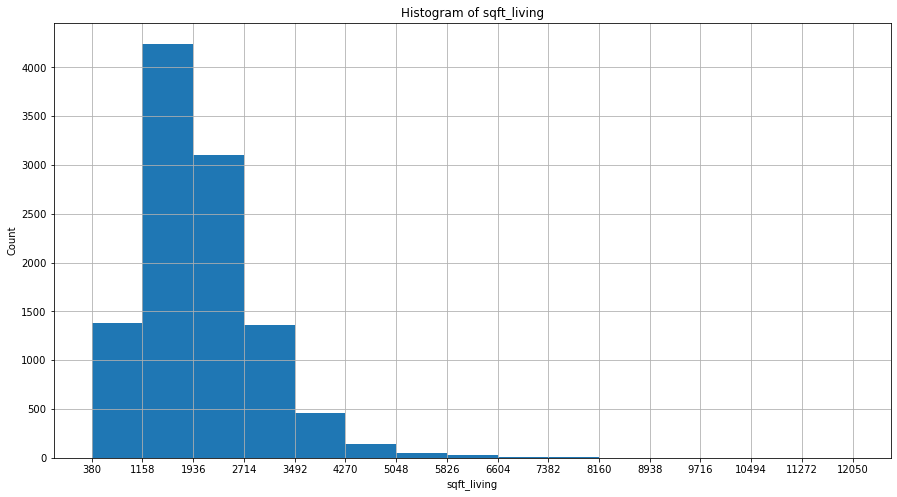

In [12]:
bins = np.linspace(min(df["sqft_living"]), max(df["sqft_living"]), 16)
bins

df['sqft_living'].plot(kind='hist', 
                       figsize=(15, 8), 
                       grid=True,
                       bins=15)

plt.xticks(bins)

# Set x/y labels and plot title
plt.xlabel("sqft_living")
plt.ylabel("Count")
plt.title("Histogram of sqft_living")

plt.show()

* More than 4000 houses contributed between 1158 to 1936 sqft_living
* More than 3000 houses contributed between 1936 to 2714 sqft_living

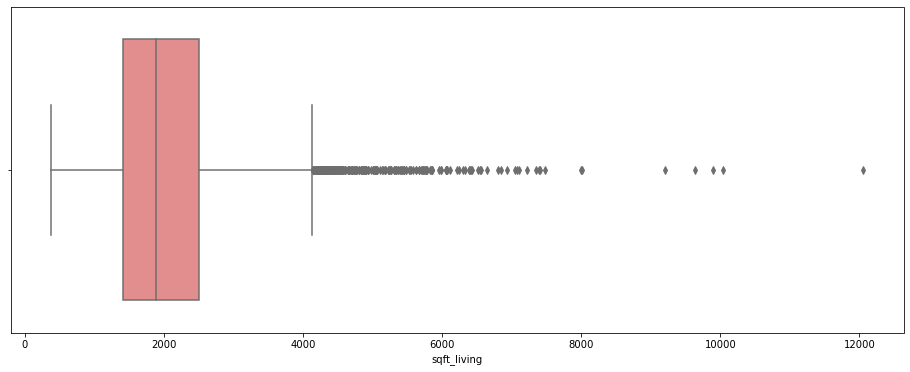

In [13]:
plt.figure(figsize=(16,6))
sns.boxplot(x='sqft_living', data=df, color='lightcoral')

plt.show()

Houses having sqft_living greater than 4100 are outliers or extreme values in the data set 

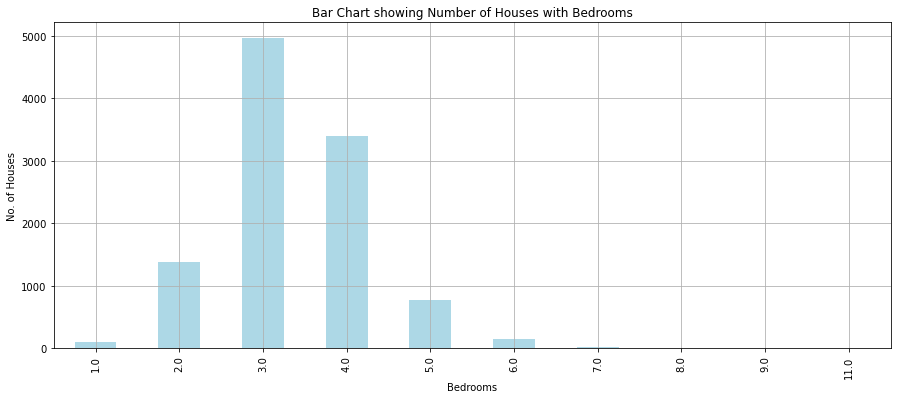

In [14]:
df_bedrooms = df['bedrooms'].value_counts().to_frame()
df_bedrooms.sort_index(inplace=True)
df_bedrooms

df_bedrooms['bedrooms'].plot(kind='bar', 
                             figsize=(15, 6), 
                             color='lightblue',
                             grid=True)

# Set x/y labels and plot title
plt.xlabel("Bedrooms")
plt.ylabel("No. of Houses")
plt.title("Bar Chart showing Number of Houses with Bedrooms")

plt.show()

* Approx. 5000 houses consists of 3 bedrooms.
* Approx. 3500 houses consists of 4 bedrooms

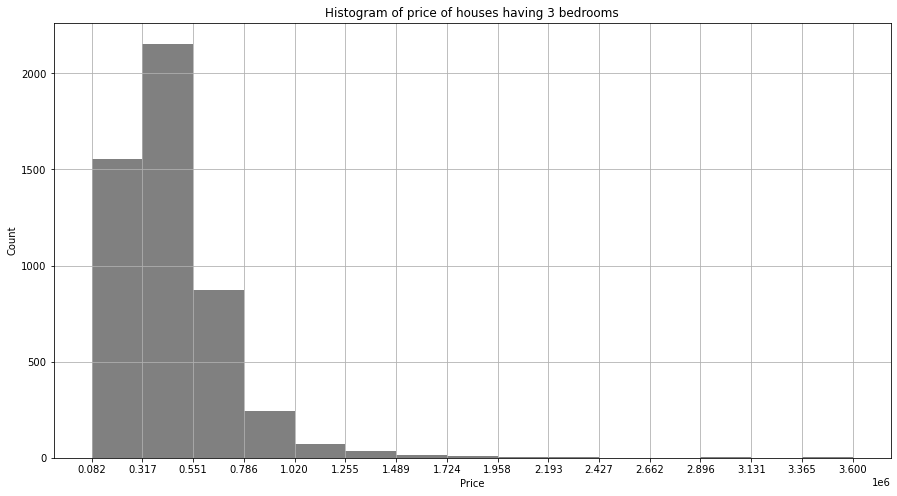

In [15]:
df_bedrooms3 = df[df['bedrooms']==3]

bins = np.linspace(min(df_bedrooms3["price"]), max(df_bedrooms3["price"]), 16)
bins

df_bedrooms3['price'].plot(kind='hist', 
                       figsize=(15, 8), 
                       grid=True,
                       color='gray',
                       bins=15)

plt.xticks(bins)

# Set x/y labels and plot title
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Histogram of price of houses having 3 bedrooms")

plt.show()

Mostly, the houses having 3 bedrooms were sold between 317,000 to 551,000 dollars

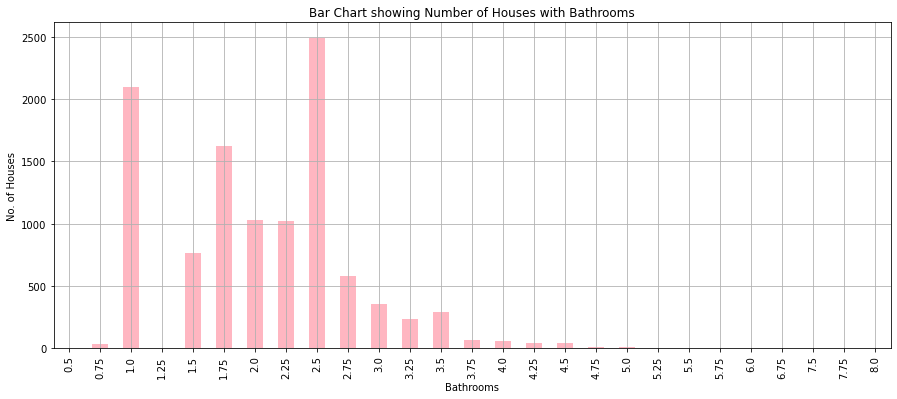

In [16]:
df_bathrooms = df['bathrooms'].value_counts().to_frame()
df_bathrooms.sort_index(inplace=True)
df_bathrooms

df_bathrooms['bathrooms'].plot(kind='bar', 
                               figsize=(15, 6), 
                               color='lightpink',
                               grid=True)

# Set x/y labels and plot title
plt.xlabel("Bathrooms")
plt.ylabel("No. of Houses")
plt.title("Bar Chart showing Number of Houses with Bathrooms")

plt.show()

* Approx. 2500 houses consists of 2.5 bathrooms.
* Approx. 2100 houses consists of 1 bathrooms
* Approx. 1650 houses consists of 1.75 bathrooms

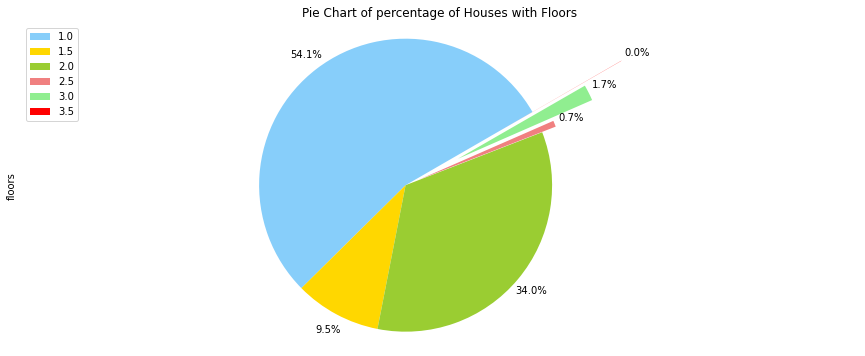

In [17]:
df_floors = df['floors'].value_counts().to_frame()
df_floors.sort_index(inplace=True)
df_floors

colors_list = ['lightskyblue', 'gold', 'yellowgreen', 'lightcoral', 'lightgreen', 'red']
explode_list = [0, 0, 0, 0.1, 0.4, 0.7]

df_floors['floors'].plot(kind='pie', 
                         figsize=(15, 6),
                         autopct='%1.1f%%',
                         startangle=30,
                         pctdistance=1.12,
                         labels=None, 
                         colors=colors_list,
                         explode=explode_list
                         )

plt.title('Pie Chart of percentage of Houses with Floors') 
plt.axis('equal') 

# add legend
plt.legend(labels=df_floors.index, loc='upper left') 

plt.show()

* 54.1% houses consists of 1 floor
* 34% houses consists of 2 floors
* 9.5% houses consists of 1.5 floors

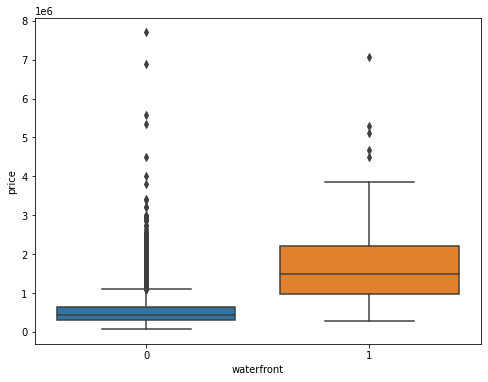

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='waterfront', y='price',data=df)

plt.show()

Here we see that the distribution of price between the house which does not has a view to a waterfront and the house which has a view to a waterfront are distinct enough to take waterfront as a potential good predictor of price.

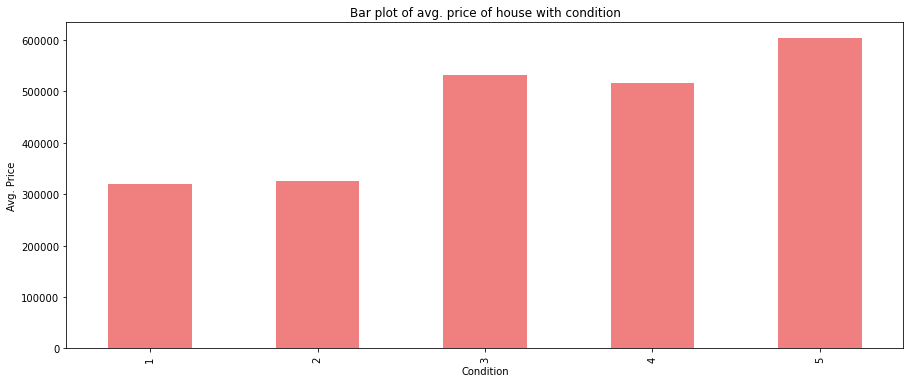

In [19]:
df_condition = df[['condition','price']]
df_condition = df_condition.groupby(['condition']).mean()


df_condition['price'].plot(kind='bar',
                           figsize=(15, 6), 
                           color='lightcoral')

# Set x/y labels and plot title
plt.xlabel("Condition")
plt.ylabel("Avg. Price")
plt.title("Bar plot of avg. price of house with condition")

plt.show()

The price of houses increases with increase in condition of the houses.

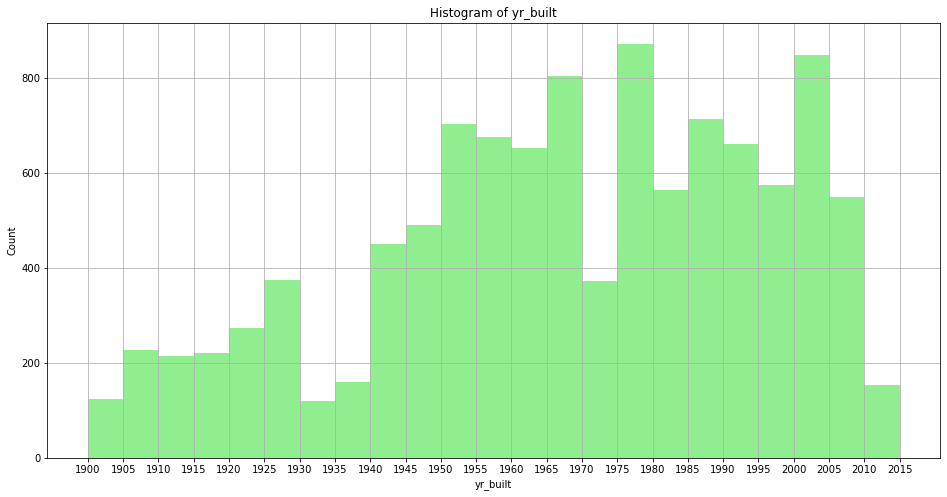

In [20]:
bins = np.linspace(min(df["yr_built"]), max(df["yr_built"]), 24)
bins

df['yr_built'].plot(kind='hist', 
                       figsize=(16, 8), 
                       grid=True,
                       color='lightgreen',
                       bins=23)

plt.xticks(bins)

# Set x/y labels and plot title
plt.xlabel("yr_built")
plt.ylabel("Count")
plt.title("Histogram of yr_built")

plt.show()

* More than 800 houses were renovated between 1975-1980 and 2000-2005
* Approx. 800 houses were renovated between 1965-1970

Generally, the number of houses getting renovated is increasing year on year.

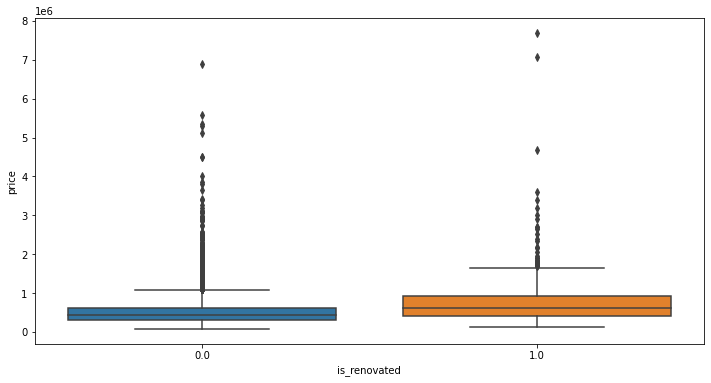

In [21]:
df.loc[(df['yr_renovated'] == 0), 'is_renovated'] = 0
df.loc[(df['yr_renovated'] != 0), 'is_renovated'] = 1

plt.figure(figsize=(12, 6))
sns.boxplot(x='is_renovated', y='price', data=df)

plt.show()

Here we see that the distribution of price between the houses that were not renovated and the houses that were renovated  differs. As such, is_renovated could potentially be a predictor of price.

**LEARNING OUTCOMES**

We learnt to describe data using various methods such as Pie chart, Bar chart, Outlier detection using Boxplot and Histogram.